## Introduction:
In the era of digital transformation, online reviews have become a powerful driving force influencing consumer choices and business reputation. Yelp, a prominent user-generated review platform, houses a vast repository of valuable insights encapsulated within millions of reviews. This project delves into the Yelp review dataset, employing data cleaning and natural language processing techniques to uncover hidden patterns and sentiments. By analyzing this rich textual data, we aim to assist businesses in understanding customer feedback, enhancing their services, and gaining an edge in an ever-competitive market. Let us embark on a journey of data exploration and sentiment analysis, revealing the untold story behind Yelp's myriad reviews.

## Motivation and Dataset Description:
Yelp is a popular online platform where users can provide reviews and ratings for businesses ranging from restaurants, cafes, and bars to local services and shops. The Yelp review dataset offers a wealth of information from millions of user-generated reviews, making it a valuable resource for conducting data-driven analyses and gaining insights into customer sentiments and behavior.

The primary motivation behind this project is to explore the Yelp review dataset and leverage natural language processing (NLP) techniques to uncover patterns, sentiments, and trends hidden within the vast volume of textual data. By harnessing NLP, we aim to extract valuable information from the reviews, such as sentiment polarity, key phrases, and common topics, that can aid businesses in understanding customer feedback and enhancing their services.

## Dataset Description:
The Yelp review dataset is a comprehensive collection of user reviews, encompassing multiple attributes such as user IDs, business IDs, review text, and star ratings. The dataset spans diverse geographical locations, businesses, and user demographics, providing a rich and varied set of reviews.

The main columns in the dataset include:

- `review_id`: A unique identifier for each review.
- `user_id`: The identifier of the user who wrote the review.
- `business_id`: The identifier of the business being reviewed.
- `stars`: The star rating given by the user (ranging from 1 to 5).
- `useful`, `funny`, `cool`: The counts of how many users marked the review as useful, funny, or cool.
- `text`: The textual content of the review.
- `date`: The date and time when the review was posted.

The dataset contains millions of reviews, making it a massive corpus of text that can be mined for valuable insights. However, like any real-world dataset, it also presents challenges, such as missing data, potential outliers, and the need for proper data cleaning and preprocessing.

By analyzing the Yelp review dataset, we aim to unravel patterns of user behavior, perform sentiment analysis to gauge customer sentiments, and contribute to a better understanding of user feedback on various businesses.

## Research Question
How well can sentiment analysis accurately predict the sentiment polarity of Yelp reviews compared to the user-provided star ratings?

In this study, we aim to employ Natural Language Processing (NLP) techniques, such as the VADER SentimentIntensityAnalyzer, to extract sentiment scores from the textual content of Yelp reviews. The research question focuses on comparing these sentiment scores with the star ratings assigned by users to assess the level of alignment between sentiment and rating.

Through this analysis, we seek to explore whether the extracted sentiments closely align with the star ratings or if there are instances of discrepancies. By validating the sentiment analysis against user ratings, we aim to gain insights into the efficacy of NLP methods for capturing sentiment from reviews and uncover any underlying patterns in the user feedback.

## Required Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import regex
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
#from langdetect import detect, DetectorFactory

## Get Data

In [5]:
# We used python to extract the data from the tar file and save it to a csv file in the /data folder
# tar file can be downloaded from here: https://www.yelp.com/dataset

reviews_df_raw = pd.read_csv('yelp_academic_dataset_review.csv')

In [6]:
# Added this as I dont have the csv version - MB
reviews_df = pd.read_json('yelp_academic_dataset_review.json',lines =True)

In [7]:
reviews_df = reviews_df_raw

NameError: name 'reviews_df_raw' is not defined

## EDA

In [ ]:
reviews_df.head()

NameError: name 'reviews_df' is not defined

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [ ]:
reviews_df.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


In [ ]:
reviews_df.isnull().sum()

review_id      0
user_id        1
business_id    2
stars          2
useful         2
funny          2
cool           2
text           2
date           3
dtype: int64

In [ ]:
duplicate_rows = reviews_df.duplicated().sum()
duplicate_review_text = reviews_df.duplicated(subset=['text']).sum()

print(f'Count of duplicate rows: {duplicate_rows}')
print(f'Count of duplicate review text: {duplicate_review_text}')

In [ ]:
duplicate_review_text_df = reviews_df[reviews_df.duplicated(subset='text', keep=False)]
sorted_duplicate_review_text_df = duplicate_review_text_df.sort_values(by='text')
sorted_duplicate_review_text_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6720172,4n5GRXIfsqPK6f4gvV-WDg,v3rb9TCvIH2Wnxp7wdvQOA,tsa8CBbBOcLfMYeUqIMovg,2.0,4.0,0.0,0.0,!!,2015-04-07 16:52:13
6364250,1FIeKZRI13-MMoyErZw3fA,TFAzjuXuibeN2JC328KbXg,-9NmUeTphyS9Lq1o9MACGw,4.0,0.0,0.0,0.0,!!,2015-05-03 14:06:26
3753726,xUR9r9_vVb9EwcXlu-yaLA,5RZDMSpeMNEJcgtgMxzGDQ,TjXbh5PwgCOFkvbi0_qrmA,1.0,1.0,0.0,0.0,!!!!!!!!\n!!!!!!!!\n!!!!!!!Do not eat here \nI...,2018-06-06 00:52:54
3897866,RHxAvqe7npDBxVVff5VRWA,5RZDMSpeMNEJcgtgMxzGDQ,TjXbh5PwgCOFkvbi0_qrmA,1.0,3.0,0.0,1.0,!!!!!!!!\n!!!!!!!!\n!!!!!!!Do not eat here \nI...,2018-06-26 22:23:27
4135426,by7RHCv3KEZ89C576_kNkA,dWu1E1lmdFZF7P621TPSEQ,CySqUcNz8oPiQTu4EXTnig,4.0,2.0,0.0,0.0,"""Burger of the Moment"" Do it! It is fantastic!...",2021-10-12 23:29:05
...,...,...,...,...,...,...,...,...,...
6621132,SqIjfoyzh5zzXwOc0SbX0Q,-aomHB1h0K6M5ysOBujv-w,Nt8bwriX3NX249EJC7XUsQ,5.0,0.0,0.0,0.0,凉拌土豆丝和牛筋好吃，服务员很热心，店的位置也很容易找 chinatown算是一家不错的面馆...,2015-01-30 23:05:57
3966004,gHWg7CsSAZmvNavF2JccXA,658KY3BAcjeSAK_d2LOMDA,8yUdqNLViWhmfbYVltkJ7Q,1.0,1.0,0.0,0.0,土曜日のブランチに来ました。たくさんの広い席があり自由に座れるので、とてもゆったり座れます。...,2017-10-27 10:00:10
3575987,PaOTpCGwVpxSPyE3XOA-Pg,658KY3BAcjeSAK_d2LOMDA,8yUdqNLViWhmfbYVltkJ7Q,2.0,0.0,0.0,0.0,土曜日のブランチに来ました。たくさんの広い席があり自由に座れるので、とてもゆったり座れます。...,2017-10-28 14:04:30
2923303,We were welcomed at the door. The staff here w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove duplicate rows
reviews_df = reviews_df[~reviews_df.duplicated(["text"])]
len(reviews_df)

6974127

<AxesSubplot:xlabel='stars', ylabel='count'>

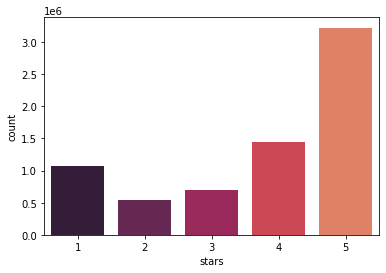

In [ ]:
sns.set_palette('rocket')
sns.countplot(x = 'stars', data = reviews_df)

In [29]:
feature_df = reviews_df.drop(['stars','text', 'business_id', 'review_id', 'user_id','date'], axis=1)
label_df = reviews_df['stars'].copy()

In [30]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   useful  int64
 1   funny   int64
 2   cool    int64
dtypes: int64(3)
memory usage: 160.0 MB


In [20]:
feature_df.count()

review_id    6990280
user_id      6990280
useful       6990280
funny        6990280
cool         6990280
date         6990280
dtype: int64

In [31]:
corr_matrix = reviews_df.corr()
print(corr_matrix)

           stars    useful     funny      cool
stars   1.000000 -0.072458 -0.043217  0.068827
useful -0.072458  1.000000  0.511803  0.718529
funny  -0.043217  0.511803  1.000000  0.607310
cool    0.068827  0.718529  0.607310  1.000000


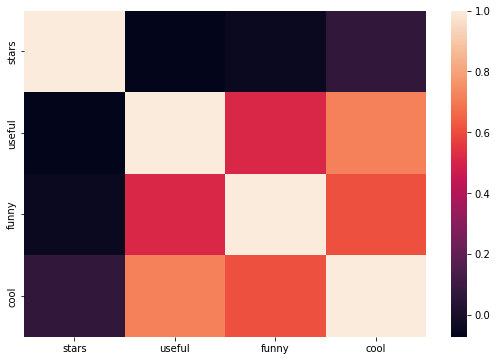

In [32]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE: ', rmse)

In [ ]:
import matplotlib.pyplot as plt

print("Logistic Regression Confusion Matrix:")
lr_confuse = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_confuse, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeRegressor()
tree_score = cross_val_score(tree_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
tree_rmse = np.sqrt(-tree_score)

print("Root Mean: ", tree_rmse.mean())
print("Standard Deviation: ", tree_rmse.std())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores)

print("Root Mean: ", rf_rmse.mean())
print("Standard Deviation: ", rf_rmse.std())

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],
}
rf_model_grid = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model_grid,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

best_model_1 = grid_search.best_estimator_
y_pred = best_model_1.predict(x_test)
rmse_1 = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", rmse_1)

In [ ]:
sorted_corr = corr_matrix['stars'].abs().sort_values(ascending=False)
top_corr = sorted_corr[1:4].index
sns.pairplot(reviews_df[top_corr])

In [ ]:
# Median is slightly lower than zero

difference = y_pred-y_test

plt.boxplot(difference)
plt.show()

In [34]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

X = x_train
y = y_train

estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name

/home/mroohwee/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index([], dtype='object')

## Data Cleaning

In [4]:
cols_to_drop =["review_id", "user_id", "useful", "funny", "cool"]
reviews_df.drop(cols_to_drop, inplace= True, axis=1)
reviews_df.head()

,business_id,stars,text,date
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [32]:
# reviews_df = reviews_df_raw.head(1000000)


In [7]:
# This takes over an hour to run

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'
# DetectorFactory.seed = 0
# reviews_df['language'] = reviews_df['text'].apply(detect_language)
# reviews_df = reviews_df[reviews_df['language'] == 'en']

reviews_df['text'] = reviews_df['text'].replace(r'\n', ' ', regex=True)

In [8]:
def isEnglish(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True
reviews_df['language'] = reviews_df['text'].apply(isEnglish)

reviews_df.sample(20)

,business_id,stars,text,date,language
5948639,kOkiP2eNv8EpSDBbTN9t5Q,1,"The dough is pre-rolled, tastes like the pizza...",2019-03-20 18:12:05,True
1279678,ne7QDP3iqkjLqTi0jckyBA,3,Went here after the Adam Sandler show last nig...,2019-06-30 14:14:52,True
3083405,0EbYHXAKFo9IsFhmZHD1Nw,5,Beer!!! If you're a beer drinker that likes to...,2012-06-17 05:45:37,True
6743022,xkWhyrBL0i_P8YdXGJ2iUg,5,"I can't recommend CoC enough, it's a must do w...",2019-09-20 05:49:44,True
631459,1FURjeGJi_LBXcJQg8eskw,5,My friend and I love seafood ! We love fish ta...,2020-06-30 19:10:02,True
3647457,L-U7myzEHcKn4Q3jYrqpUA,1,It's pretty? That's about all I can say. The f...,2014-04-06 14:31:00,True
6653408,BckdIX8fO4DU1_imxObJPA,5,Came in for some steel toe work books. There a...,2019-04-12 04:38:26,True
6276828,RM2frvRtz5LgdBZEZexRkQ,4,Only got 4 stars because of the extremely long...,2022-01-04 17:25:33,True
555055,ZeRqDDgOMr6bvpovHZHazA,5,Love this place! Well maintained & designed ga...,2022-01-16 16:37:53,True
747088,n3JY3G7vfvj9M1Mcclirjg,5,Purchased a Civic for my recent graduate from ...,2016-07-16 01:24:23,True


In [14]:
reviews_df[reviews_df['language'] == False].count

<bound method DataFrame.count of                     business_id  stars  \
2        YjUWPpI6HXG530lwP-fb2A      3   
29       ltBBYdNzkeKdCNPDAsxwAA      2   
68       PzhPMkaNYiKDTHoTG0r8rw      4   
287      N2i1U4Z6GHEw9V02N2u6JA      5   
382      JcP1z6eZBgTIcxWlyxSw0g      5   
...                         ...    ...   
6990166  GcdnRUlL97pSycc1WEOybQ      3   
6990183  M_0zLqa-CAhNDXCXhmmwiA      2   
6990189  1N9WC6FwF8MSc7BHbIP35A      4   
6990207  kxOR-Z62MnMUlCZWQmd2iQ      4   
6990211  VgPDZyDLIWe4NVetnvjqig      3   

                                                      text  \
2        Family diner. Had the buffet. Eclectic assortm...   
29       I at least have to give this restaurant two st...   
68       After 3 weeks of working in the area I finally...   
287      We used The Hollander Hotel for our wedding ho...   
382      After today's lunch, Iris has moved to the top...   
...                                                    ...   
6990166  So, to be honest, I

In [15]:
reviews_df[reviews_df['language'] == True].count

<bound method DataFrame.count of                     business_id  stars  \
0        XQfwVwDr-v0ZS3_CbbE5Xw      3   
1        7ATYjTIgM3jUlt4UM3IypQ      5   
3        kxX2SOes4o-D3ZQBkiMRfA      5   
4        e4Vwtrqf-wpJfwesgvdgxQ      4   
5        04UD14gamNjLY0IDYVhHJg      1   
...                         ...    ...   
6990275  jals67o91gcrD4DC81Vk6w      5   
6990276  2vLksaMmSEcGbjI5gywpZA      5   
6990277  R1khUUxidqfaJmcpmGd4aw      4   
6990278  Rr9kKArrMhSLVE9a53q-aA      5   
6990279  VAeEXLbEcI9Emt9KGYq9aA      3   

                                                      text  \
0        If you decide to eat here, just be aware it is...   
1        I've taken a lot of spin classes over the year...   
3        Wow!  Yummy, different,  delicious.   Our favo...   
4        Cute interior and owner (?) gave us tour of up...   
5        I am a long term frequent customer of this est...   
...                                                    ...   
6990275  Latest addition to 

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mroohwee/nltk_data...


True

In [6]:
scores = []
for i in range(len(reviews_df)):
    # get the text in the review
    sentence = reviews_df.iloc[i][2].strip()
    # tokenize the text
    tokens = word_tokenize(sentence.lower())
    tokens = [x for x in tokens if x not in stopwords.words('english') and x.isalpha()]
    # lematize the tokens
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(x) for x in tokens]
    final_text = ' '.join(tokens)
    # analyze the sentence
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(final_text)
    scores.append(score)

KeyboardInterrupt: 

In [23]:
scores_df = pd.DataFrame(scores)
scores_df.head(10)

,neg,neu,pos,compound
0,0.000,0.747,0.253,0.8968
1,0.040,0.557,0.403,0.9883
2,0.000,0.669,0.331,0.9360
3,0.000,0.441,0.559,0.9652
4,0.024,0.604,0.372,0.9792
5,0.139,0.552,0.309,0.8074
6,0.096,0.638,0.267,0.9523
7,0.000,0.390,0.610,0.9678
8,0.200,0.593,0.206,0.1300
9,0.035,0.587,0.378,0.9696


In [24]:
new_df = pd.concat([reviews_df, scores_df], axis=1) 
new_df

,business_id,stars,text,date,neg,neu,pos,compound
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0.000,0.747,0.253,0.8968
1,7ATYjTIgM3jUlt4UM3IypQ,5.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,0.040,0.557,0.403,0.9883
2,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0.000,0.669,0.331,0.9360
3,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.000,0.441,0.559,0.9652
4,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,0.024,0.604,0.372,0.9792
...,...,...,...,...,...,...,...,...
4995,ZY2feSm2sc5nTXYHnKpMGQ,4.0,After trying the pizza here on Halloween night...,2015-12-05 11:37:33,0.134,0.584,0.282,0.9485
4996,bKgyXSQUGA8IHGt8ne5NuA,5.0,Went here today with my family and I must say ...,2015-12-21 08:16:29,0.000,0.473,0.527,0.9815
4997,l7b33ubze8Jqw7C4I1CAuA,1.0,My Room was disgusting. The odor when I walked...,2012-03-30 05:33:31,0.190,0.731,0.078,-0.9008
4998,cXAKeC-EgVChIxhS7fscmw,5.0,First time my girlfriend and I came here and i...,2018-01-09 22:18:57,0.000,0.495,0.505,0.9604
